# Power Spectral Density Randomizer

Below code will be used to randomize light color asuming it is being produced by a light bulb with a temperature rating T (K). To do this, I will radomize the frequencies by choosing a random frequency with uniform probabilty and then a random value of spectral radiance with uniform probability. If the random value of spectral radiance is less than the value of Planck's law calculated with the random frequency I will store the random frequency, otherwise I will repeat the random sampling. I will do this until I have N frequencies.

Planck's Law
$B(\nu,T) = \frac{2h\nu^3}{c^2}\frac{1}{e^{\frac{h\nu}{k_BT}}-1}$

Aside: This is Planck's law in 3D, I think that will be correct for our idea, but I have not completely thought it through

In [27]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm.auto import tqdm

In [42]:
T=5800 #Temperature in Kelvin (5800 is approximately the BB-temp of sun)
N=1000000 #number of samples we want
f=[] #list of frequencies, to be filled
c= 3*10**8 #constant speed of light in m/s
h = 6.6261*10**(-34) #Planck's constant in J/s
kB = 1.381*10**(-23) #Boltzmann constant in 1/K
wF = c*T/(2898*10**(-6)) #This is Wien's frequency, using Wien's law, calculate the peak frequency, use this to get the domain of interest

In [43]:
def p_law(f):
    return (2*h*f**3/(c**2))*(1/(np.exp(h*f/(kB*T))-1))

In [47]:
def generator():
    i=0
    while i<=N:
        nu = np.random.uniform(low = .001*wF, high = 2*wF)
        B = np.random.uniform(high = 3*p_law(wF))
        if B<p_law(nu):
            f.append(nu)
            i+=1
            yield

        else:
            pass
    
        
for _ in tqdm(generator(), total = N+1): pass

  0%|          | 0/1000001 [00:00<?, ?it/s]

<AxesSubplot:ylabel='Count'>

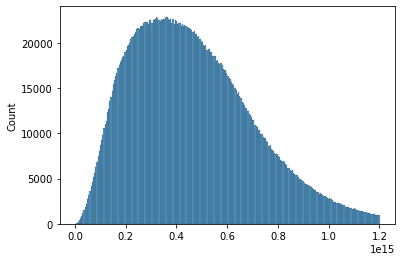

In [48]:
sns.histplot(f)